**Title: Big Mart Sales Prediction using Random Forest Regressor**

**Objective:** To analyze which type of products are selling the most in order to make better decision making and to predict the future sales performance of a particular product. The objective is to forecast sales of different items at different outlets of Big Mart using Random Forest Regressor predictive model.

**Data Source:** The Dataset used is:  https://github.com/YBI-Foundation/Dataset/raw/main/Big%20Sales%20Data.csv

The different features or the attributes of the dataset are:


1.   Item Identifier
2.   Item Weight
3.   Item Fat Content
4.   Item Visibility
5.   Item Type
6.   Item MRP
7.   Outlet Identifier
8.   Outlet Establishment Year
9.   Outlet Size
10.   Outlet Location Type
11.   Outlet Type
12.   Item Outlet Sales





**Import Library**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [7]:
big_sales = pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/Big%20Sales%20Data.csv")

**Describe Data**

In [8]:
# Displaying the first 5 rows of the dataset
big_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [9]:
# Information of the Dataset
big_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [10]:
# Description or statistics of the Dataset
big_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [11]:
# Number of Data Points and Features
big_sales.shape

(14204, 12)

In [12]:
# Number of unique categories in a column
big_sales.nunique()

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             9144
dtype: int64

**Categorical Features**



1.   Item_Identifier
2.   Item_Fat_Content
3.   Item_Type
4.   Outlet_Identifier
5.   Outlet_Size
6.   Outlet_Location_Type
7.   Outlet_Type



**Data Preprocessing**

In [13]:
# Checking for missing values
big_sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  2389
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
# Handling missing values
# Find Mean value of Item_Weight column
big_sales_mean = big_sales['Item_Weight'].mean()
big_sales_mean



12.788355480321624

In [15]:
# Replace the missing values ofItem_Weight column with its mean
big_sales['Item_Weight'].fillna(big_sales_mean, inplace=True)

In [16]:
# Re-Checking for missing values
big_sales.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Data Visualization**

In [17]:
# Graphs/Plots of Numerical features
sns.set()

<ipython-input-18-a7d2cf8e42c6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_sales['Item_Weight'])


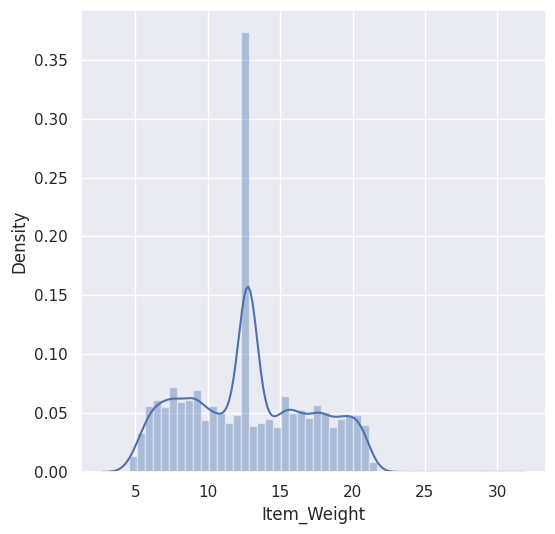

In [18]:
# Item_Weight Distribution
plt.figure(figsize=(6,6))
sns.distplot(big_sales['Item_Weight'])
plt.show()

<ipython-input-25-df17207b8b27>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_sales['Item_MRP'])


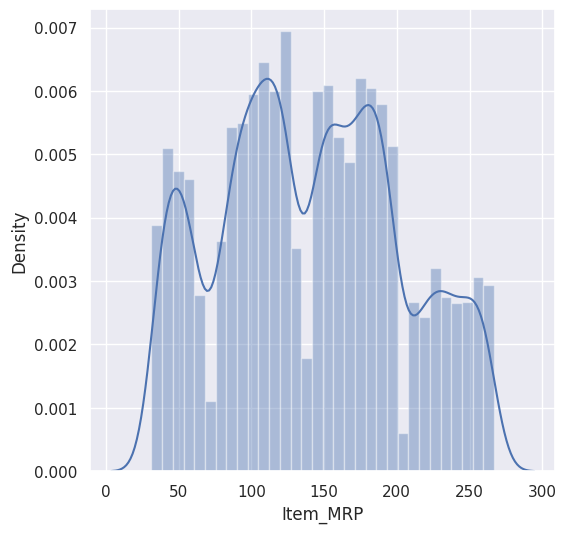

In [ ]:
# Item_MRP Distribution
plt.figure(figsize=(6,6))
sns.distplot(big_sales['Item_MRP'])
plt.show()

<ipython-input-26-45b02def9b9a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_sales['Item_Outlet_Sales'])


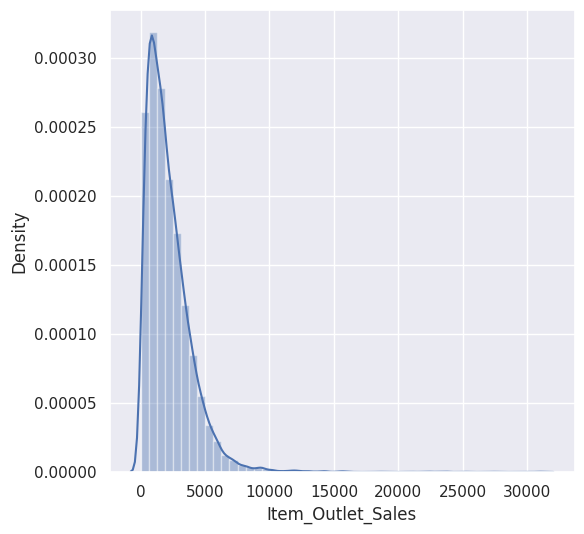

In [ ]:
# Item_Outlet_Sales Distribution
plt.figure(figsize=(6,6))
sns.distplot(big_sales['Item_Outlet_Sales'])
plt.show()

<ipython-input-37-adf984d5cd84>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outlet_Establishment_Year",data=big_sales,palette = "Set1")


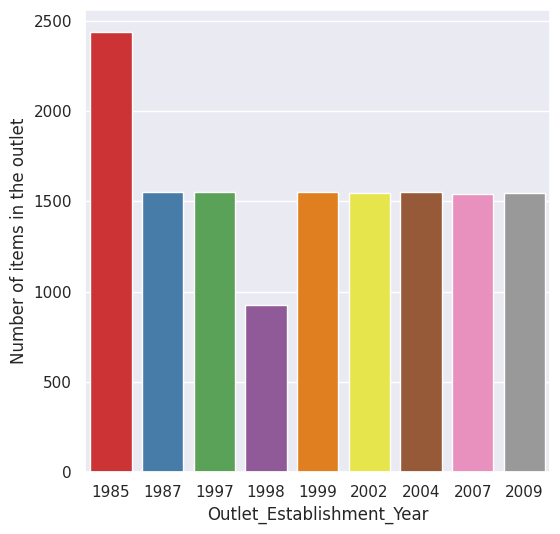

In [37]:
# Outlet_Establishment_Year Plot
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Establishment_Year",data=big_sales,palette = "Set1")
plt.ylabel('Number of items in the outlet')
plt.show()

<ipython-input-36-fd6c8de38bdf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Item_Fat_Content",data=big_sales,palette = "Paired")


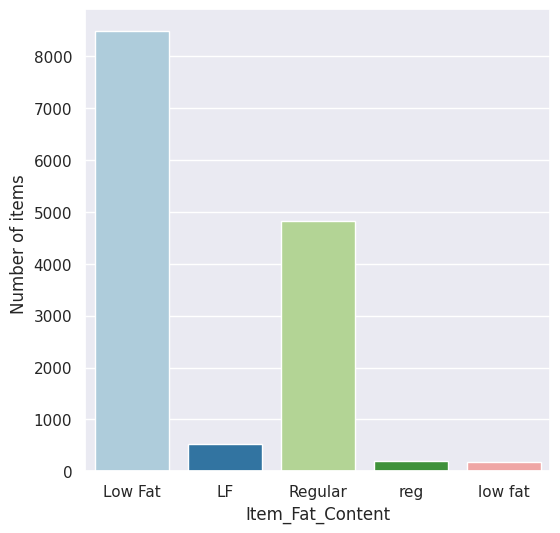

In [36]:
# Item_Fat_Content Column
plt.figure(figsize=(6,6))
sns.countplot(x="Item_Fat_Content",data=big_sales,palette = "Paired")
plt.ylabel('Number of items ')
plt.show()

<ipython-input-24-8d7a808bc4fd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Item_Type",data=big_sales,palette = "Set1")


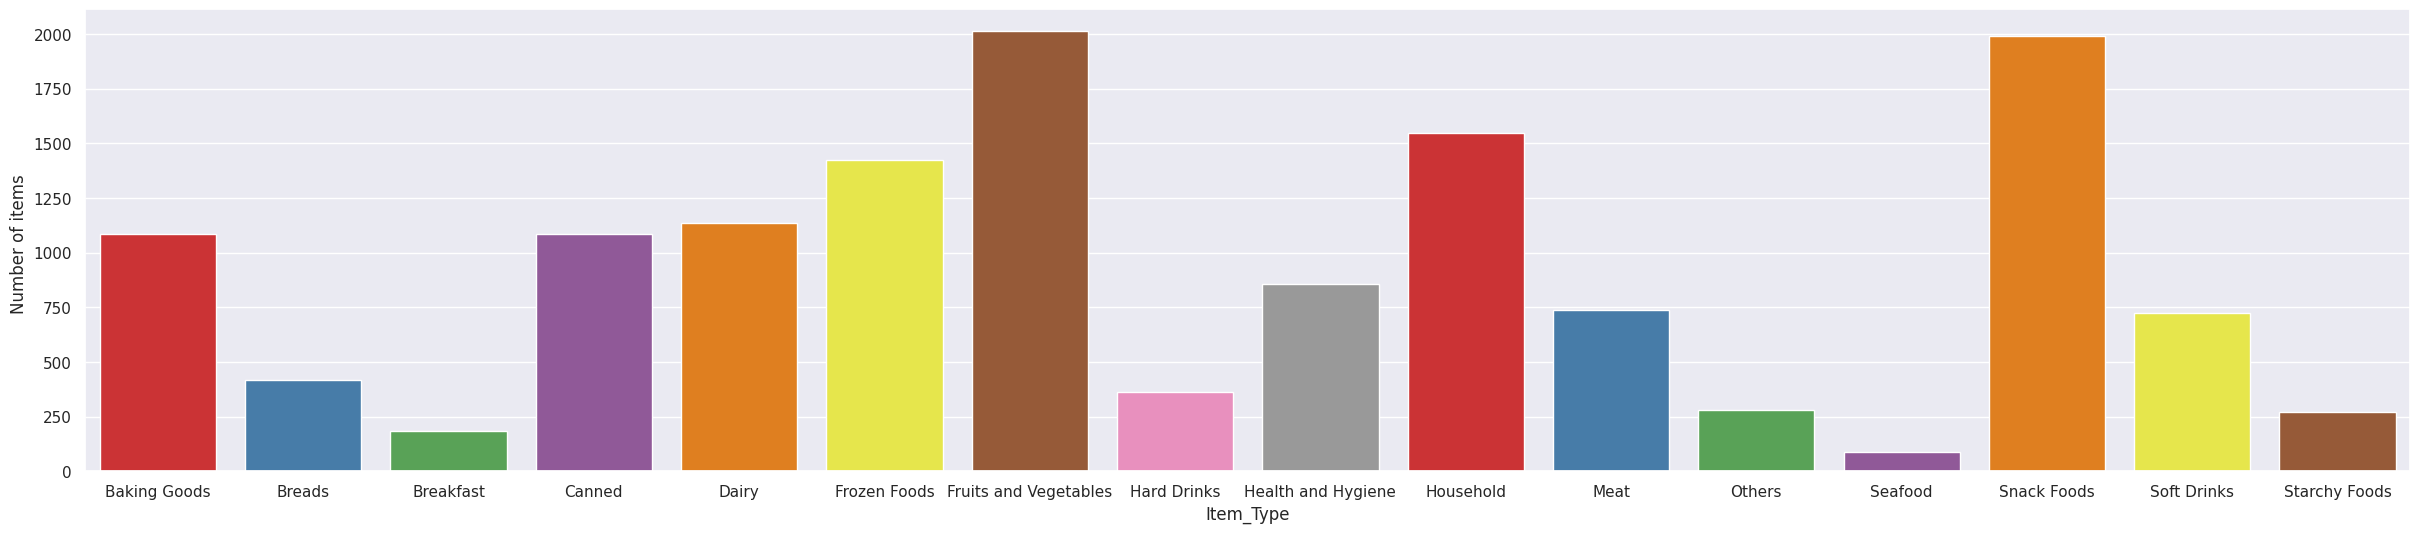

In [24]:
# Item_Type Column
plt.figure(figsize=(30,6))
sns.countplot(x="Item_Type",data=big_sales,palette = "Set1")
plt.ylabel('Number of items ')
plt.show()

<ipython-input-31-04a8f998a891>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outlet_Size",data=big_sales, palette = "Set1")


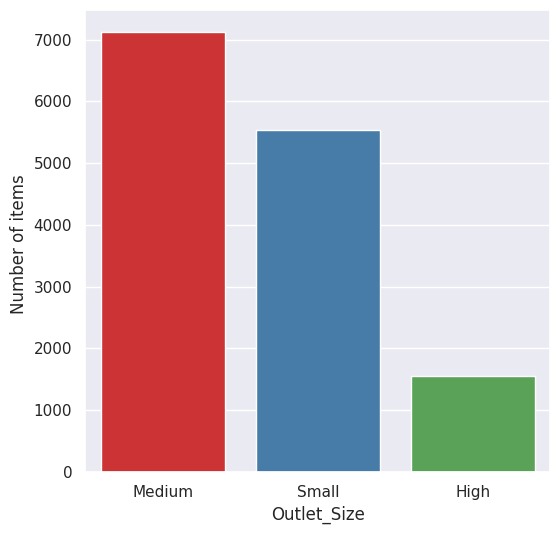

In [31]:
# Outlet_Size Column
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Size",data=big_sales, palette = "Set1")
plt.ylabel('Number of items ')
plt.show()

<ipython-input-39-5cbc43a13c23>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outlet_Location_Type",data=big_sales, palette="Set2")


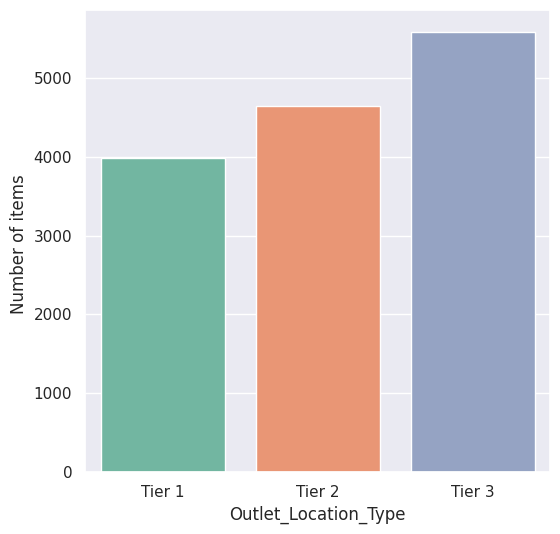

In [39]:
# Outlet_Location_Type Column
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Location_Type",data=big_sales, palette="Set2")
plt.ylabel('Number of items ')
plt.show()

<ipython-input-21-893583839c99>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outlet_Type",data=big_sales, palette = "Set1")


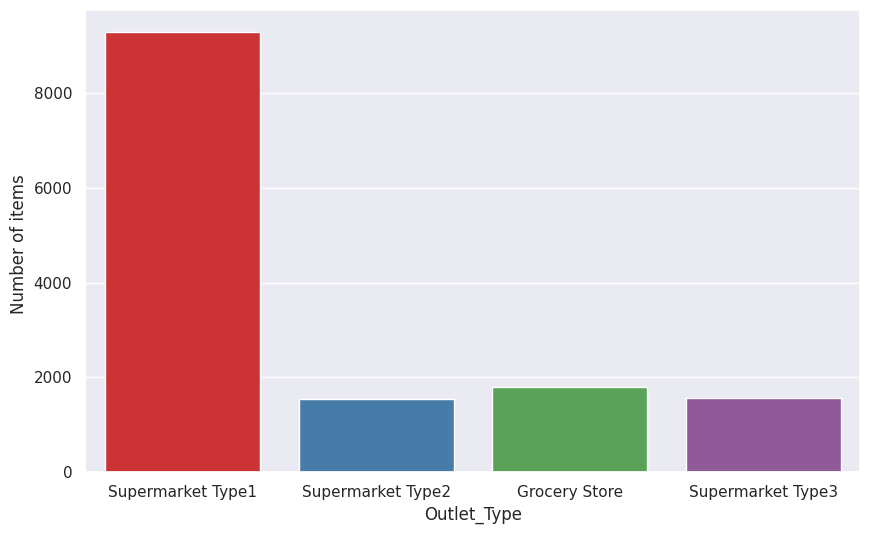

In [21]:
# Outlet_Type Column
plt.figure(figsize=(10,6))
sns.countplot(x="Outlet_Type",data=big_sales, palette = "Set1")
plt.ylabel('Number of items ')
plt.show()

**Data Preprocessing(Grouping similar categorical variables into one group)**

In [19]:
big_sales['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

In [20]:
# Grouping similar variables into one category or column
big_sales.replace({'Item_Fat_Content':{'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}},inplace=True)

In [21]:
# Let's check whether the change happened or not
big_sales['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

In [23]:
big_sales['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64

In [24]:
big_sales['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: count, dtype: int64

In [25]:
big_sales['Outlet_Size'].value_counts()

Outlet_Size
Medium    7122
Small     5529
High      1553
Name: count, dtype: int64

In [26]:
big_sales['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: count, dtype: int64

In [27]:
big_sales['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: count, dtype: int64

**Label Encoding**

In [28]:
# Importing Scikit Learn- Label Encoder module
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [29]:
# Replacing categorical columns to integers for further computations
big_sales.replace({'Item_Fat_Content':{"Low Fat":0, "Regular":1 }}, inplace=True)

In [30]:
big_sales['Item_Identifier'] = encoder.fit_transform(big_sales['Item_Identifier'])
big_sales['Item_Type'] = encoder.fit_transform(big_sales['Item_Type'])
big_sales['Outlet_Identifier'] = encoder.fit_transform(big_sales['Outlet_Identifier'])
big_sales['Outlet_Size'] = encoder.fit_transform(big_sales['Outlet_Size'])
big_sales['Outlet_Location_Type'] = encoder.fit_transform(big_sales['Outlet_Location_Type'])
big_sales['Outlet_Type'] = encoder.fit_transform(big_sales['Outlet_Type'])

In [66]:
big_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,946,12.3,0,0.111448,0,33.4874,9,1999,1,0,1,436.608721
1,946,12.3,0,0.111904,0,33.9874,2,2007,1,1,1,443.127721
2,946,12.3,0,0.111728,0,33.9874,3,2009,1,2,2,564.598400
3,946,12.3,0,0.000000,0,34.3874,4,1985,2,0,0,1719.370000
4,740,9.8,1,0.045523,0,35.0874,2,2007,1,1,1,352.874000


In [31]:
# To check the columns of the dataset
big_sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

**Defining Target Variable(y) and Feature Variables(X)**

In [32]:
y = big_sales['Item_Outlet_Sales']
X = big_sales[['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type', 'Item_MRP', 'Outlet_Identifier','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']]

**Splitting the Data into Training and Testing sets**

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_Test,y_train,y_test = train_test_split(X,y,random_state=2529)
X_train.shape,X_Test.shape,y_train.shape,y_test.shape

((10653, 11), (3551, 11), (10653,), (3551,))

**Modeling**

In [34]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

**Prediction**

In [35]:
y_predict = model.predict(X_Test)

**Model Evaluation**

In [2]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error,r2_score


In [36]:
# R squared value
r2_score(y_test,y_predict)

0.5466052543523208

In [78]:
mean_absolute_percentage_error(y_test,y_predict)

0.7099452762214781

In [80]:
mean_absolute_error(y_test,y_predict)

826.0054140107447

**Explanation**

**Why Random Forest Regressor algorithm for Big Mart Sales Prediction?**

Because this algorithm has the ability to handle wide range of data types that includes numerical data, categorical data or even missing values. This algorithm uses multiple decision trees and by aggregating their outputs it results in highly accurate predictions.

The steps involved to implement Big Mart Sales prediction using Random Forest Regressor:


1.   Importing the required libraries and the dataset.
2.   Data Preprocessing to check for any missing values and to label the categorical values.
3.   Data Visualization to understand the data.
4.   Splitting the dataset columns into X(input variables/features) and y(output variable or the feature to be predicted). Then divide the dataset into two sets called Train set and Test set using train_test_split function.
5.   Model Creation and Training by importing RandomForestRegressor from sklearn.esemble module and then using the fit() for training the model by passing the arguments as X_train and y_train.
6.   After training the model it's time to predict the values by feeding the X_test as argument to predict() to know the corresponding predicted values of y.
7.   The final step is to evaluate the model, how well the model has predicted the values. Metrics such as r2_score, mean squared error percentage, mean squared error are used to compare the actual values with the predicted values.


